# SRU_ASSIGNMENT1

In [29]:
from scipy.io import wavfile
from scipy import signal as spect
from sympy import fft
import numpy as np
import time
import cmath
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
import math
import librosa

import matplotlib.pyplot as plot

file="mono.wav"
#fs, data = wavfile.read(file)
data,fs=librosa.load(file, sr=1000)
print("size of the input array-->",len(data))

time = np.linspace(0, len(data) / fs, num=len(data))

print("input-->",data)
print("No. of sample points per second-->",fs)
plot.xlabel('Time')

plot.ylabel('Amplitude')
plot.plot(time,data)
plot.show

ModuleNotFoundError: No module named 'mlxtend'

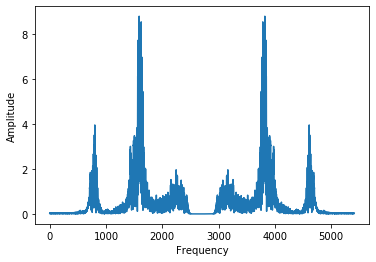

In [3]:
fft_array=np.fft.fft(data)
plot.xlabel('Frequency')
plot.ylabel('Amplitude')
plot.plot(abs(fft_array))
plot.show()

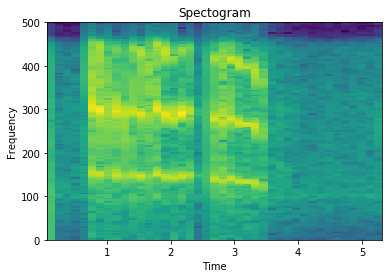

In [4]:
plot.specgram(data,Fs=fs,NFFT=256,noverlap=128,mode='magnitude')
plot.title("Spectogram")
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()

In [8]:
def dft(input):
    pi=math.pi
    N=int(len(input))
    res=[]
    for f in range(0,N):
        temp=0.0
        for n in range(0,N):
            omega=2*pi*f
            temp=temp+input[n]* cmath.exp(-1j*omega*n/N)
        res.append(abs(temp))
    return res

In [9]:
#outDFT=dft(data)
DFT=dft(data[2500:2600])
print(DFT)
print(abs(np.fft.fft(data[2500:2600])))

[0.00014830862102144238, 0.00017412576575243888, 0.0001304730159300615, 0.00017129641807132358, 0.00012003081202671124, 0.00010092344144685716, 0.0003872315411308874, 0.00043108818700965287, 0.0004238635636150144, 0.00029238534979472843, 0.001319648554959746, 0.0009279909629680983, 0.001148086341435005, 0.0005057335202368299, 0.0014366240979132238, 0.001219983882540001, 0.0009062389853975617, 0.001205687748145275, 0.00033234747598975595, 0.0002640711360304778, 7.843486755070834e-05, 0.00020944425928104497, 0.000588594112131236, 0.0006844722620117892, 0.0008159261123025677, 0.0003463587499424894, 0.0004243013383710693, 0.000602248112917993, 0.0006626486964311366, 0.0017298403644917019, 0.0006602681763794171, 0.0005189906924726712, 0.0002898790730675184, 0.00032961396219077, 0.0002371640505720755, 0.00023950085507372655, 0.00038503157741046106, 0.00026097182610563467, 0.00044029184028987825, 0.00021365785773272352, 0.0004761234032675594, 0.0001682547971218044, 9.38535885649268e-05, 0.000

In [10]:
def stft(inp,fft_size,window_size,overlaps):
    s1=[]
    #inner_pad = np.zeros(fft_size-window_size)
    
    for i in range(0,fft_size,overlaps)  :
        
        arr=inp[i:i+window_size]
        arr=arr*np.hamming(window_size)
        #arr=np.append(arr,inner_pad)
        d=dft(arr)
        s1.append(d)
    
    l = 20*np.log10(s1)
    return l


In [11]:
#print(res)
res=stft(data,4864,256,128)

 


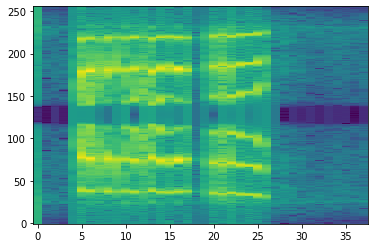

38


In [12]:
img = plot.imshow(res.transpose(), origin='lower',aspect='auto')
plot.show()
print(len(res))

# F0 : Fundamental Frequency

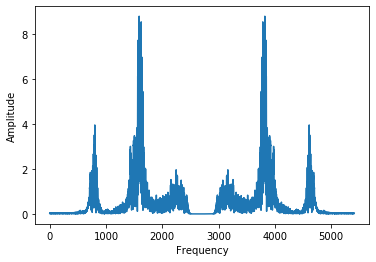

In [13]:
plot.xlabel('Frequency')
plot.ylabel('Amplitude')
magnitude_fft=abs(fft_array)
#magnitude_fft=10*np.log10(magnitude_fft)
plot.plot(magnitude_fft)
plot.show()

In [14]:

f0=[]

for i in range(0,5000,1000):
    temp_arr=[]
    for j in range(i,i+999):
        temp_arr.append(magnitude_fft[j])
    f0.append(np.argmax(temp_arr))
    #print(len(temp_arr))
    
sum=0.0
m=0.0
for i in range(0,len(f0)):
    sum+=f0[i]
    f0[i]=m+f0[i]
    m+=1000
print("Peaks at frequencies-",f0)
maxpeak=np.argmax(magnitude_fft)
print("maximum peak at frequency-",maxpeak)
#print("(MATHEMATICALLY)frequency tends to zero is the right choice for fundamental frequency, as all frequencies are harmonics (multiples) of it")

Peaks at frequencies- [800.0, 1589.0, 2246.0, 3822.0, 4611.0]
maximum peak at frequency- 1589


# MFCC

In [19]:
def mfcc(data):
    n=1280
    overlap=128
    window=256
    arr=[]
    for i in range(0,window,overlap):
        temp=data[i:window]
        temp=temp*np.hamming(window)
        dft2=(np.fft.fft(temp))
        periodogram=abs(dft2)*abs(dft2)*(1/n)
        arr.append(periodogram)
    return list
        

In [ ]:
coef=mfcc(data)

In [28]:
mfccs = librosa.feature.mfcc(data, sr=fs)
print(mfccs.shape)
#print(mfccs)
sns.pairplot(mfccs)

(20, 11)


TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>